In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("mxmh_survey_cleaned.csv")
df.head()

,timestamp,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,...,frequency_rb,frequency_rap,frequency_rock,frequency_video_game_music,anxiety,depression,insomnia,ocd,music_effects,permissions
0,2022-08-27 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,Improve,I understand.
1,2022-08-27 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,Improve,I understand.
2,2022-08-27 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,2022-08-27 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,2022-08-27 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [3]:
# Convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [25]:
# Extract month and day
df['month'] = df['timestamp'].dt.month
df['date'] = df['timestamp'].dt.date


# Trend 1 Number of Survey Responses Over Time
    How actively were people filling out the survey over time?

C:\Users\dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


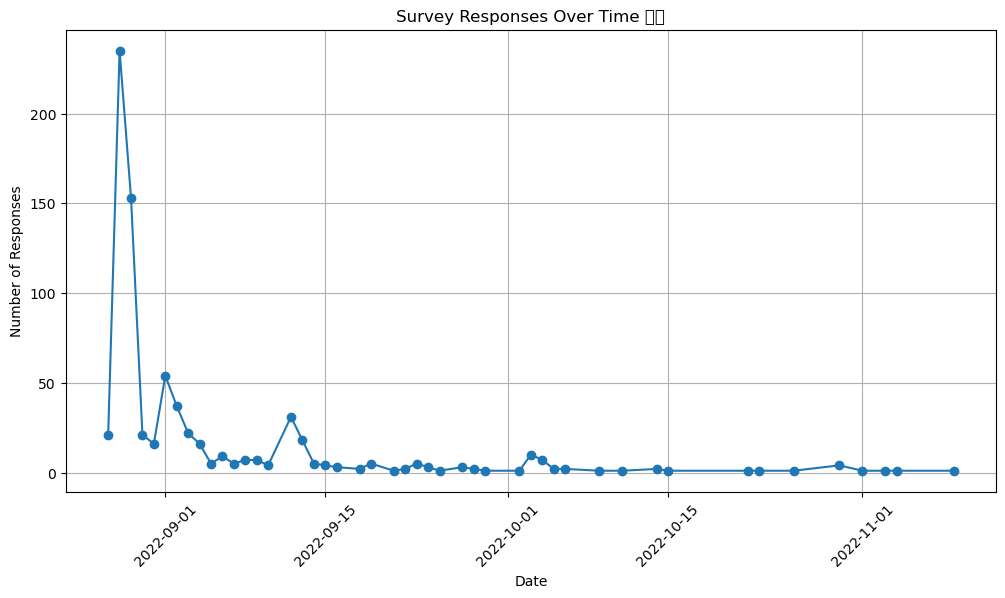

In [9]:
# Plot number of responses over time
responses_by_date = df['date'].value_counts().sort_index()

plt.figure(figsize=(12,6))
responses_by_date.plot(marker='o')
plt.title("Survey Responses Over Time 📈🗓️")
plt.xlabel("Date")
plt.ylabel("Number of Responses")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Trend 2 Satisfaction (Music Effects) Over Time 🎶
    🎶 Tracking how people's satisfaction with music's emotional impact changed day-by-day!

C:\Users\dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127925 (\N{MUSICAL NOTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


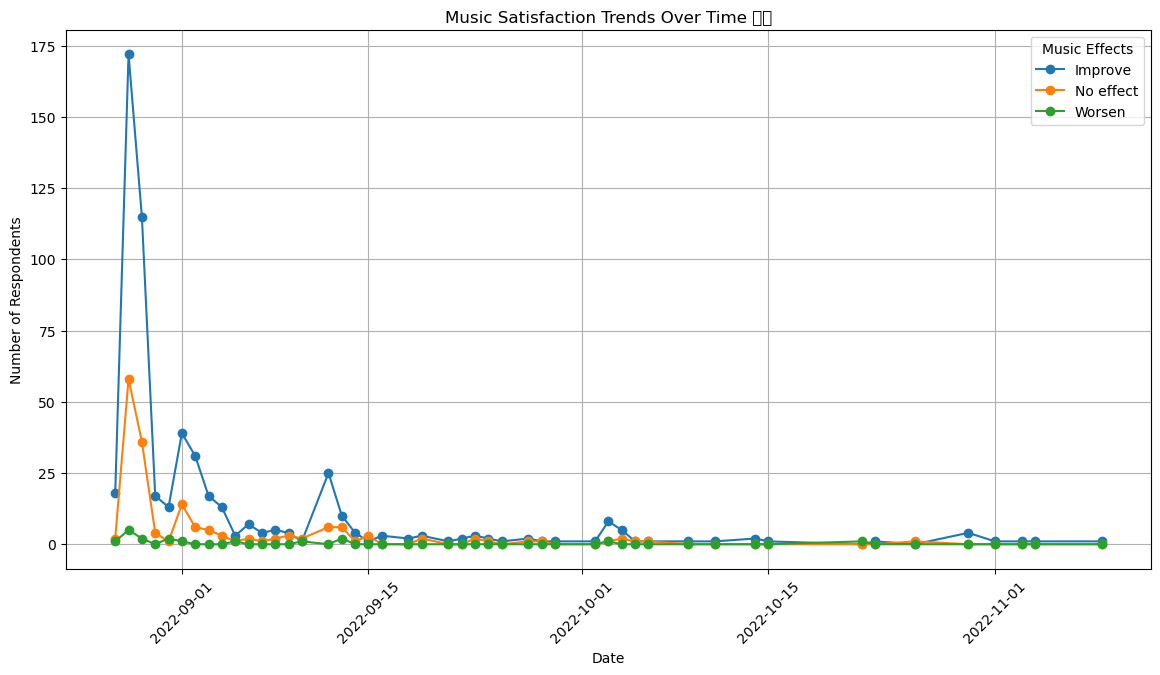

In [13]:
# Group by date and music effects
music_effect_trend = df.groupby(['date', 'music_effects']).size().unstack().fillna(0)

# Plot
music_effect_trend.plot(figsize=(14,7), marker='o')
plt.title("Music Satisfaction Trends Over Time 🎵📈")
plt.xlabel("Date")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.legend(title="Music Effects")
plt.grid(True)
plt.show()


# Trend 3 Average Anxiety/Depression Over Time 
    🧠 Checking how average mental health indicators (like anxiety & depression) varied over time!

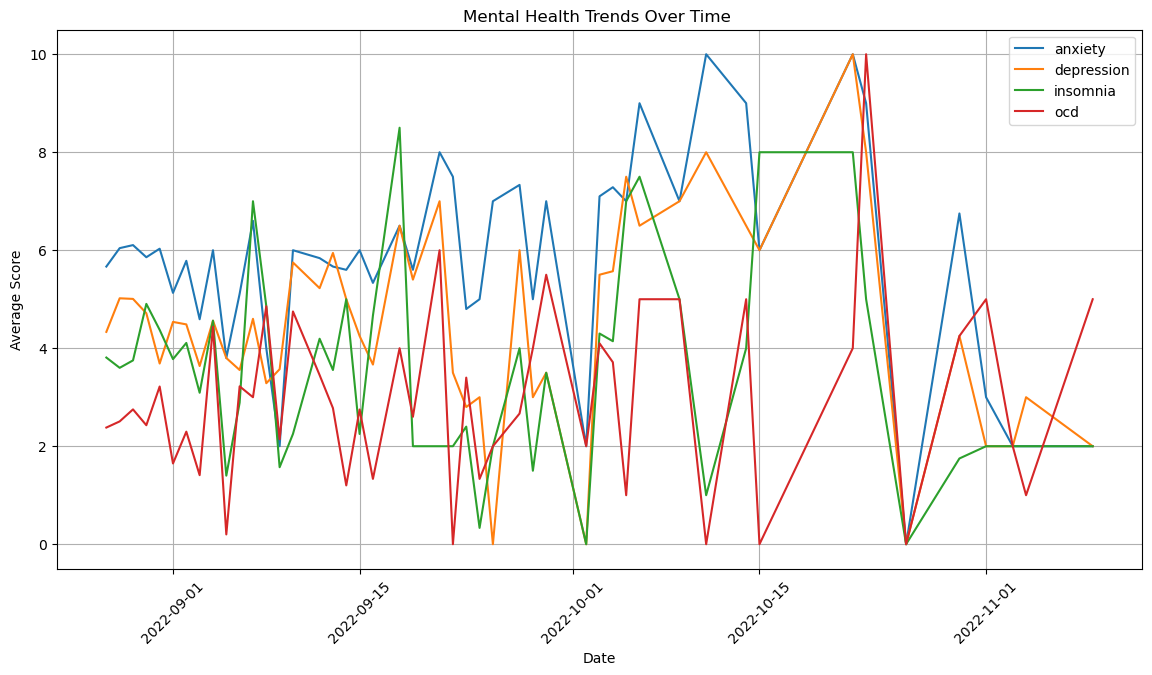

In [18]:
# Group by date and calculate average scores
mental_health_trend = df.groupby('date')[['anxiety', 'depression', 'insomnia', 'ocd']].mean()

# Plot
mental_health_trend.plot(figsize=(14,7))
plt.title("Mental Health Trends Over Time ")
plt.xlabel("Date")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Data Aggregation and Grouping

In [29]:
# Dark mode setup
plt.style.use('dark_background')
sns.set_theme(style='darkgrid', palette='rocket')

In [31]:
# Creating Age Groups
bins = [0, 18, 25, 35, 50, 100]
labels = ['<18', '18-25', '26-35', '36-50', '50+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

C:\Users\dell\AppData\Local\Temp\ipykernel_11848\341242528.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='primary_streaming_service', y='hours_per_day', data=grouped_service, palette='mako')


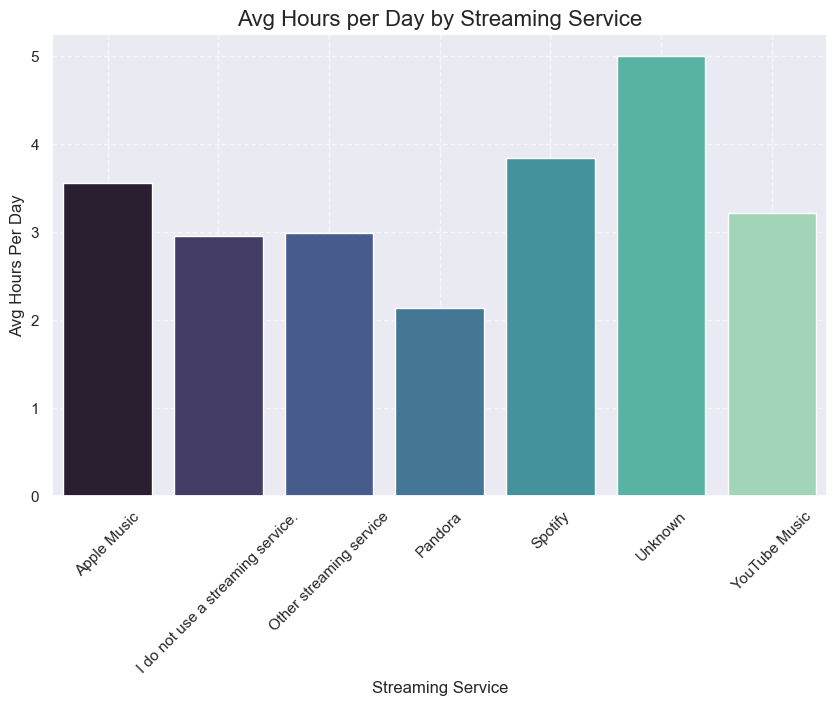

In [33]:
grouped_service = df.groupby('primary_streaming_service')['hours_per_day'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='primary_streaming_service', y='hours_per_day', data=grouped_service, palette='mako')
plt.title('Avg Hours per Day by Streaming Service', fontsize=16)
plt.xlabel('Streaming Service')
plt.ylabel('Avg Hours Per Day')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_11848\1765673937.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age = df.groupby('age_group')['hours_per_day'].mean().reset_index()
C:\Users\dell\AppData\Local\Temp\ipykernel_11848\1765673937.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='hours_per_day', data=grouped_age, palette='magma')


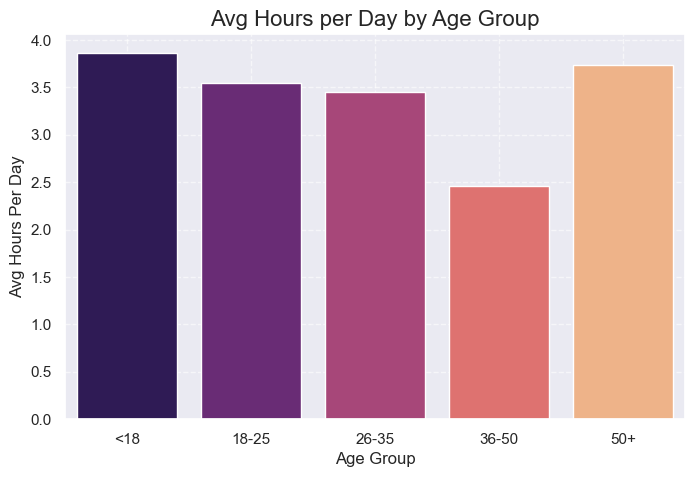

In [37]:
# Group by 'age_group' 
grouped_age = df.groupby('age_group')['hours_per_day'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='age_group', y='hours_per_day', data=grouped_age, palette='magma')
plt.title('Avg Hours per Day by Age Group', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Avg Hours Per Day')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_11848\70357117.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hours_per_day', y='fav_genre', data=grouped_genre, palette='viridis')


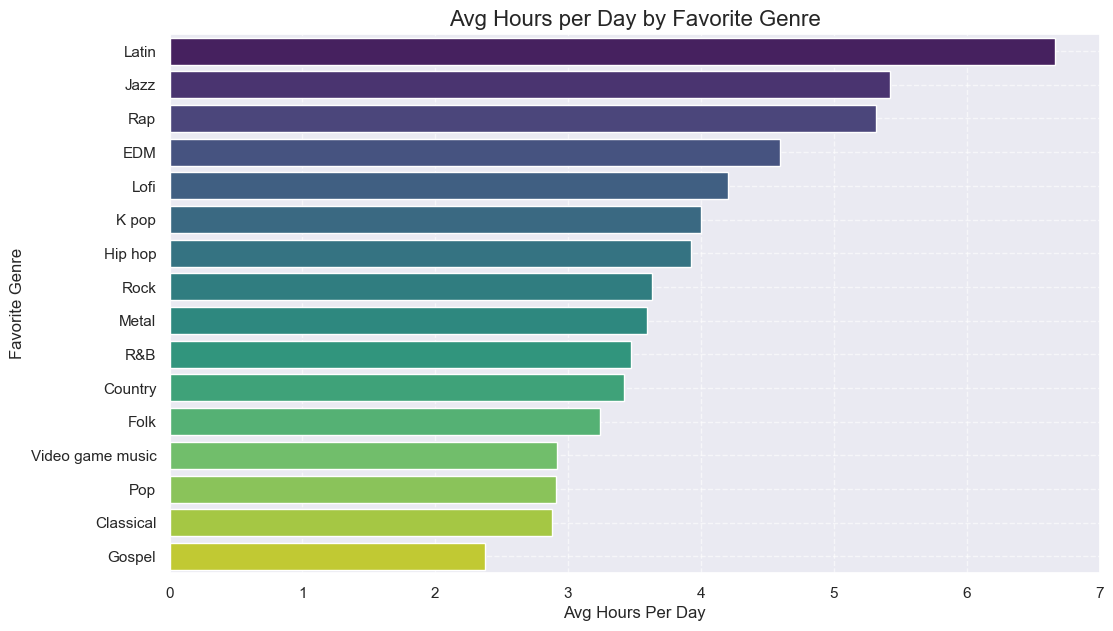

In [39]:
# Group by 'fav_genre' 
grouped_genre = df.groupby('fav_genre')['hours_per_day'].mean().reset_index().sort_values('hours_per_day', ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x='hours_per_day', y='fav_genre', data=grouped_genre, palette='viridis')
plt.title('Avg Hours per Day by Favorite Genre', fontsize=16)
plt.xlabel('Avg Hours Per Day')
plt.ylabel('Favorite Genre')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()